# LAB Monday: Scrape the current top 100 songs and their respective artists, and put the information into a pandas dataframe.

In [ ]:
#Importing required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

#Define the url to scrape the Hot 100 songs data
url = 'https://www.billboard.com/charts/hot-100/'

#Make a GET request to the URL
results = requests.get(url, headers = {'Accept-Language':'en-US'})

#Create a BeautifulSoup object from the content of the request
soup = BeautifulSoup(results.content, 'html.parser')

#Scrape the song title and artist name from the HTML
song_titles = [song.get_text(strip=True) for song in soup.select('h3.c-title.a-no-trucate')]
artists = [artist.get_text(strip=True) for artist in soup.select('span.c-label.a-no-trucate')]

#Create a dataframe to store the scraped data
songs = pd.DataFrame({'Song Title': song_titles, 'Artist': artists})

#Display the dataframe

In [3]:
import numpy as np
songs['Rank']=np.arange(len(songs))+1

In [4]:
songs

,Song Title,Artist,Rank
0,Flowers,Miley Cyrus,1
1,Kill Bill,SZA,2
2,Anti-Hero,Taylor Swift,3
3,Creepin',"Metro Boomin, The Weeknd & 21 Savage",4
4,Unholy,Sam Smith & Kim Petras,5
...,...,...,...
95,Do It Again,NLE Choppa & 2Rare,96
96,Miss You,Oliver Tree & Robin Schulz,97
97,Back End,Finesse2Tymes,98
98,Open Arms,SZA Featuring Travis Scott,99


# LAB Wednesday: API wrappers - Create your collection of songs & audio features

In [5]:
# Import the required libraries
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import getpass

# Request the user's Spotify client ID and secret
client_id = str(getpass.getpass('client_id?'))
client_secret = str(getpass.getpass('client_secret?'))

# Create a client credentials manager with the client ID and secret
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

# Get the tracks from the specified playlist using the user's Spotify account
playlist = sp.user_playlist_tracks('Bradnumber1','1YL4XoegERoragv0RK2RC9')

# Print all the keys of the playlist dictionary
playlist.keys()

# Get the ID of the 5th track in the playlist
playlist['items'][4]['track']['id']

# Get the total number of tracks in the playlist
playlist['total']

# Define a function to get all the tracks from the specified playlist
def get_playlist_tracks(user_id,playlist_id):
    # Get the first set of tracks from the playlist
    results = sp.user_playlist_tracks(user_id,playlist_id)
    tracks = results['items']
    # Continue getting tracks while there are more
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

# Get all the tracks from the specified playlist
full_track_ids = get_playlist_tracks('Bradnumber1','1YL4XoegERoragv0RK2RC9')

# Initialize lists to store the title, artist, and ID of each track
title = []
artist = []
song_id = []

# Loop through each track in the full list of track IDs
for i in full_track_ids:
    # Add the title, artist, and ID of each track to the respective lists
    title.append(i['track']['name'])
    artist.append(i['track']['artists'][0]['name'])
    song_id.append(i['track']['id'])

# Create a Pandas dataframe from the title, artist, and ID lists
playlist_df = pd.DataFrame({'title': title, 'artist': artist, 'song_id': song_id})


client_id? ········
client_secret? ········


In [6]:
playlist_df=pd.DataFrame({'title': title, 'artist': artist, 'song_id': song_id})


In [7]:
playlist_df


,title,artist,song_id
0,Suspicious Minds,Elvis Presley,1H5IfYyIIAlgDX8zguUzns
1,And We Danced,The Hooters,5xkNd7kCRmjT2DxSAYVVyC
2,Love Theme from St. Elmo's Fire - Instrumental,David Foster,65Wspymr1UkFIT0WRyVJnI
3,Better - Remastered,The Screaming Jets,6VtSR2Nw3IozhsRmsKzIET
4,Accidentally In Love,Counting Crows,4FXdIM78OBdw7KIY2jeM8D
...,...,...,...
9982,Growing on Me,The Darkness,77asYwewm0lXvz76inosJm
9983,One Way Ticket,The Darkness,44x9GdJsYmbaYRBm8ROyfL
9984,Givin' Up,The Darkness,3LDsZ7JCzTwfuTRuteUqtB
9985,Gypsy Woman (She's Homeless) (La Da Dee La Da ...,Crystal Waters,4QAKfScH8kLJTbJqhb2jp2


In [8]:
#Create an empty list to store audio features for each track
spaceplaylist = []

#Loop through the songs in the playlist and retrieve audio features for each track
for i in range(len(playlist_df)):
    try :
        spaceplaylist.extend(sp.audio_features(tracks=playlist_df['song_id'][i]))
    except :
        print(i)

1925
9270


In [9]:
song_features=pd.DataFrame.from_dict(spaceplaylist)


In [10]:
song_features


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.487,0.382,7,-10.889,1,0.0309,0.042200,0.000005,0.4110,0.714,116.557,audio_features,1H5IfYyIIAlgDX8zguUzns,spotify:track:1H5IfYyIIAlgDX8zguUzns,https://api.spotify.com/v1/tracks/1H5IfYyIIAlg...,https://api.spotify.com/v1/audio-analysis/1H5I...,261280,4
1,0.561,0.945,9,-6.086,1,0.0444,0.086900,0.000000,0.2200,0.723,145.781,audio_features,5xkNd7kCRmjT2DxSAYVVyC,spotify:track:5xkNd7kCRmjT2DxSAYVVyC,https://api.spotify.com/v1/tracks/5xkNd7kCRmjT...,https://api.spotify.com/v1/audio-analysis/5xkN...,227760,4
2,0.570,0.404,8,-13.761,1,0.0361,0.501000,0.668000,0.1040,0.312,125.201,audio_features,65Wspymr1UkFIT0WRyVJnI,spotify:track:65Wspymr1UkFIT0WRyVJnI,https://api.spotify.com/v1/tracks/65Wspymr1UkF...,https://api.spotify.com/v1/audio-analysis/65Ws...,209400,4
3,0.486,0.819,2,-5.334,1,0.0711,0.000226,0.000000,0.0366,0.439,101.536,audio_features,6VtSR2Nw3IozhsRmsKzIET,spotify:track:6VtSR2Nw3IozhsRmsKzIET,https://api.spotify.com/v1/tracks/6VtSR2Nw3Ioz...,https://api.spotify.com/v1/audio-analysis/6VtS...,277680,4
4,0.555,0.926,7,-3.613,1,0.0363,0.048400,0.000008,0.1710,0.771,138.017,audio_features,4FXdIM78OBdw7KIY2jeM8D,spotify:track:4FXdIM78OBdw7KIY2jeM8D,https://api.spotify.com/v1/tracks/4FXdIM78OBdw...,https://api.spotify.com/v1/audio-analysis/4FXd...,188387,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,0.401,0.848,2,-4.247,1,0.0484,0.000340,0.000023,0.3420,0.487,136.214,audio_features,77asYwewm0lXvz76inosJm,spotify:track:77asYwewm0lXvz76inosJm,https://api.spotify.com/v1/tracks/77asYwewm0lX...,https://api.spotify.com/v1/audio-analysis/77as...,208880,4
9981,0.506,0.761,11,-5.603,1,0.0973,0.012200,0.000007,0.0860,0.491,132.436,audio_features,44x9GdJsYmbaYRBm8ROyfL,spotify:track:44x9GdJsYmbaYRBm8ROyfL,https://api.spotify.com/v1/tracks/44x9GdJsYmba...,https://api.spotify.com/v1/audio-analysis/44x9...,266973,4
9982,0.560,0.927,11,-3.126,1,0.0503,0.016200,0.000165,0.2360,0.818,136.613,audio_features,3LDsZ7JCzTwfuTRuteUqtB,spotify:track:3LDsZ7JCzTwfuTRuteUqtB,https://api.spotify.com/v1/tracks/3LDsZ7JCzTwf...,https://api.spotify.com/v1/audio-analysis/3LDs...,214960,4
9983,0.645,0.779,9,-10.529,0,0.0315,0.000165,0.214000,0.0941,0.453,120.007,audio_features,4QAKfScH8kLJTbJqhb2jp2,spotify:track:4QAKfScH8kLJTbJqhb2jp2,https://api.spotify.com/v1/tracks/4QAKfScH8kLJ...,https://api.spotify.com/v1/audio-analysis/4QAK...,229573,4


In [11]:
playlist_features = playlist_df.merge(song_features, left_on='song_id', right_on='id')


In [12]:
playlist_features


,title,artist,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Suspicious Minds,Elvis Presley,1H5IfYyIIAlgDX8zguUzns,0.487,0.382,7,-10.889,1,0.0309,0.042200,...,0.4110,0.714,116.557,audio_features,1H5IfYyIIAlgDX8zguUzns,spotify:track:1H5IfYyIIAlgDX8zguUzns,https://api.spotify.com/v1/tracks/1H5IfYyIIAlg...,https://api.spotify.com/v1/audio-analysis/1H5I...,261280,4
1,And We Danced,The Hooters,5xkNd7kCRmjT2DxSAYVVyC,0.561,0.945,9,-6.086,1,0.0444,0.086900,...,0.2200,0.723,145.781,audio_features,5xkNd7kCRmjT2DxSAYVVyC,spotify:track:5xkNd7kCRmjT2DxSAYVVyC,https://api.spotify.com/v1/tracks/5xkNd7kCRmjT...,https://api.spotify.com/v1/audio-analysis/5xkN...,227760,4
2,Love Theme from St. Elmo's Fire - Instrumental,David Foster,65Wspymr1UkFIT0WRyVJnI,0.570,0.404,8,-13.761,1,0.0361,0.501000,...,0.1040,0.312,125.201,audio_features,65Wspymr1UkFIT0WRyVJnI,spotify:track:65Wspymr1UkFIT0WRyVJnI,https://api.spotify.com/v1/tracks/65Wspymr1UkF...,https://api.spotify.com/v1/audio-analysis/65Ws...,209400,4
3,Better - Remastered,The Screaming Jets,6VtSR2Nw3IozhsRmsKzIET,0.486,0.819,2,-5.334,1,0.0711,0.000226,...,0.0366,0.439,101.536,audio_features,6VtSR2Nw3IozhsRmsKzIET,spotify:track:6VtSR2Nw3IozhsRmsKzIET,https://api.spotify.com/v1/tracks/6VtSR2Nw3Ioz...,https://api.spotify.com/v1/audio-analysis/6VtS...,277680,4
4,Accidentally In Love,Counting Crows,4FXdIM78OBdw7KIY2jeM8D,0.555,0.926,7,-3.613,1,0.0363,0.048400,...,0.1710,0.771,138.017,audio_features,4FXdIM78OBdw7KIY2jeM8D,spotify:track:4FXdIM78OBdw7KIY2jeM8D,https://api.spotify.com/v1/tracks/4FXdIM78OBdw...,https://api.spotify.com/v1/audio-analysis/4FXd...,188387,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10080,Growing on Me,The Darkness,77asYwewm0lXvz76inosJm,0.401,0.848,2,-4.247,1,0.0484,0.000340,...,0.3420,0.487,136.214,audio_features,77asYwewm0lXvz76inosJm,spotify:track:77asYwewm0lXvz76inosJm,https://api.spotify.com/v1/tracks/77asYwewm0lX...,https://api.spotify.com/v1/audio-analysis/77as...,208880,4
10081,One Way Ticket,The Darkness,44x9GdJsYmbaYRBm8ROyfL,0.506,0.761,11,-5.603,1,0.0973,0.012200,...,0.0860,0.491,132.436,audio_features,44x9GdJsYmbaYRBm8ROyfL,spotify:track:44x9GdJsYmbaYRBm8ROyfL,https://api.spotify.com/v1/tracks/44x9GdJsYmba...,https://api.spotify.com/v1/audio-analysis/44x9...,266973,4
10082,Givin' Up,The Darkness,3LDsZ7JCzTwfuTRuteUqtB,0.560,0.927,11,-3.126,1,0.0503,0.016200,...,0.2360,0.818,136.613,audio_features,3LDsZ7JCzTwfuTRuteUqtB,spotify:track:3LDsZ7JCzTwfuTRuteUqtB,https://api.spotify.com/v1/tracks/3LDsZ7JCzTwf...,https://api.spotify.com/v1/audio-analysis/3LDs...,214960,4
10083,Gypsy Woman (She's Homeless) (La Da Dee La Da ...,Crystal Waters,4QAKfScH8kLJTbJqhb2jp2,0.645,0.779,9,-10.529,0,0.0315,0.000165,...,0.0941,0.453,120.007,audio_features,4QAKfScH8kLJTbJqhb2jp2,spotify:track:4QAKfScH8kLJTbJqhb2jp2,https://api.spotify.com/v1/tracks/4QAKfScH8kLJ...,https://api.spotify.com/v1/audio-analysis/4QAK...,229573,4


In [13]:
playlist_features=playlist_features.drop(['id'],axis=1)


In [14]:
# ingredients
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [15]:
playlist_features.describe()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,10085.000000,10085.000000,10085.000000,10085.000000,10085.000000,10085.000000,10085.000000,10085.000000,10085.000000,10085.000000,10085.000000,1.008500e+04,10085.000000
mean,0.607843,0.681915,5.166485,-7.289117,0.698959,0.065084,0.210138,0.029236,0.186001,0.585627,121.406881,2.250153e+05,3.959941
std,0.145994,0.191900,3.574163,3.283484,0.458733,0.061216,0.249951,0.123143,0.149542,0.238993,26.287329,5.416549e+04,0.255409
min,0.000000,0.000020,0.000000,-29.368000,0.000000,0.000000,0.000003,0.000000,0.012000,0.000000,0.000000,9.122700e+04,0.000000
25%,0.514000,0.558000,2.000000,-9.103000,0.000000,0.033100,0.018700,0.000000,0.089100,0.398000,102.420000,1.926280e+05,4.000000
50%,0.617000,0.710000,5.000000,-6.547000,1.000000,0.042900,0.096400,0.000006,0.128000,0.598000,120.471000,2.199470e+05,4.000000
75%,0.710000,0.835000,8.000000,-4.898000,1.000000,0.067200,0.323000,0.000569,0.245000,0.783000,134.297000,2.505470e+05,4.000000
max,0.988000,0.997000,11.000000,2.769000,1.000000,0.711000,0.991000,0.985000,0.989000,0.995000,217.913000,1.561133e+06,5.000000


In [16]:
cluster_df=playlist_features.drop(['title','artist','type','uri','track_href','analysis_url'],axis=1)


In [17]:
cluster_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10085 entries, 0 to 10084
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           10085 non-null  object 
 1   danceability      10085 non-null  float64
 2   energy            10085 non-null  float64
 3   key               10085 non-null  int64  
 4   loudness          10085 non-null  float64
 5   mode              10085 non-null  int64  
 6   speechiness       10085 non-null  float64
 7   acousticness      10085 non-null  float64
 8   instrumentalness  10085 non-null  float64
 9   liveness          10085 non-null  float64
 10  valence           10085 non-null  float64
 11  tempo             10085 non-null  float64
 12  duration_ms       10085 non-null  int64  
 13  time_signature    10085 non-null  int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 1.2+ MB


In [18]:
cluster_df.index=cluster_df.iloc[:,0]


In [19]:
cluster_df


,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_id,,,,,,,,,,,,,,
1H5IfYyIIAlgDX8zguUzns,1H5IfYyIIAlgDX8zguUzns,0.487,0.382,7,-10.889,1,0.0309,0.042200,0.000005,0.4110,0.714,116.557,261280,4
5xkNd7kCRmjT2DxSAYVVyC,5xkNd7kCRmjT2DxSAYVVyC,0.561,0.945,9,-6.086,1,0.0444,0.086900,0.000000,0.2200,0.723,145.781,227760,4
65Wspymr1UkFIT0WRyVJnI,65Wspymr1UkFIT0WRyVJnI,0.570,0.404,8,-13.761,1,0.0361,0.501000,0.668000,0.1040,0.312,125.201,209400,4
6VtSR2Nw3IozhsRmsKzIET,6VtSR2Nw3IozhsRmsKzIET,0.486,0.819,2,-5.334,1,0.0711,0.000226,0.000000,0.0366,0.439,101.536,277680,4
4FXdIM78OBdw7KIY2jeM8D,4FXdIM78OBdw7KIY2jeM8D,0.555,0.926,7,-3.613,1,0.0363,0.048400,0.000008,0.1710,0.771,138.017,188387,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77asYwewm0lXvz76inosJm,77asYwewm0lXvz76inosJm,0.401,0.848,2,-4.247,1,0.0484,0.000340,0.000023,0.3420,0.487,136.214,208880,4
44x9GdJsYmbaYRBm8ROyfL,44x9GdJsYmbaYRBm8ROyfL,0.506,0.761,11,-5.603,1,0.0973,0.012200,0.000007,0.0860,0.491,132.436,266973,4
3LDsZ7JCzTwfuTRuteUqtB,3LDsZ7JCzTwfuTRuteUqtB,0.560,0.927,11,-3.126,1,0.0503,0.016200,0.000165,0.2360,0.818,136.613,214960,4


In [20]:
cluster_df=cluster_df.iloc[:,1:14]
cluster_df


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_id,,,,,,,,,,,,,
1H5IfYyIIAlgDX8zguUzns,0.487,0.382,7,-10.889,1,0.0309,0.042200,0.000005,0.4110,0.714,116.557,261280,4
5xkNd7kCRmjT2DxSAYVVyC,0.561,0.945,9,-6.086,1,0.0444,0.086900,0.000000,0.2200,0.723,145.781,227760,4
65Wspymr1UkFIT0WRyVJnI,0.570,0.404,8,-13.761,1,0.0361,0.501000,0.668000,0.1040,0.312,125.201,209400,4
6VtSR2Nw3IozhsRmsKzIET,0.486,0.819,2,-5.334,1,0.0711,0.000226,0.000000,0.0366,0.439,101.536,277680,4
4FXdIM78OBdw7KIY2jeM8D,0.555,0.926,7,-3.613,1,0.0363,0.048400,0.000008,0.1710,0.771,138.017,188387,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77asYwewm0lXvz76inosJm,0.401,0.848,2,-4.247,1,0.0484,0.000340,0.000023,0.3420,0.487,136.214,208880,4
44x9GdJsYmbaYRBm8ROyfL,0.506,0.761,11,-5.603,1,0.0973,0.012200,0.000007,0.0860,0.491,132.436,266973,4
3LDsZ7JCzTwfuTRuteUqtB,0.560,0.927,11,-3.126,1,0.0503,0.016200,0.000165,0.2360,0.818,136.613,214960,4


In [21]:
cluster_df.rename_axis(None, inplace=True)
cluster_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1H5IfYyIIAlgDX8zguUzns,0.487,0.382,7,-10.889,1,0.0309,0.042200,0.000005,0.4110,0.714,116.557,261280,4
5xkNd7kCRmjT2DxSAYVVyC,0.561,0.945,9,-6.086,1,0.0444,0.086900,0.000000,0.2200,0.723,145.781,227760,4
65Wspymr1UkFIT0WRyVJnI,0.570,0.404,8,-13.761,1,0.0361,0.501000,0.668000,0.1040,0.312,125.201,209400,4
6VtSR2Nw3IozhsRmsKzIET,0.486,0.819,2,-5.334,1,0.0711,0.000226,0.000000,0.0366,0.439,101.536,277680,4
4FXdIM78OBdw7KIY2jeM8D,0.555,0.926,7,-3.613,1,0.0363,0.048400,0.000008,0.1710,0.771,138.017,188387,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77asYwewm0lXvz76inosJm,0.401,0.848,2,-4.247,1,0.0484,0.000340,0.000023,0.3420,0.487,136.214,208880,4
44x9GdJsYmbaYRBm8ROyfL,0.506,0.761,11,-5.603,1,0.0973,0.012200,0.000007,0.0860,0.491,132.436,266973,4
3LDsZ7JCzTwfuTRuteUqtB,0.560,0.927,11,-3.126,1,0.0503,0.016200,0.000165,0.2360,0.818,136.613,214960,4
4QAKfScH8kLJTbJqhb2jp2,0.645,0.779,9,-10.529,0,0.0315,0.000165,0.214000,0.0941,0.453,120.007,229573,4


In [22]:
# This code is implementing the K-Means algorithm for clustering.
K_Means=KMeans(n_clusters=5, random_state=5)
cluster_model_nonscaled=K_Means.fit(cluster_df)
cluster_model_nonscaled.cluster_centers_

array([[ 6.03860008e-01,  6.42585948e-01,  5.10102545e+00,
        -7.80248652e+00,  7.53892898e-01,  6.53765667e-02,
         3.07339216e-01,  3.19333424e-02,  1.91658526e-01,
         6.54310634e-01,  1.21024884e+02,  1.68152609e+05,
         3.93771363e+00],
       [ 5.75693122e-01,  6.45763281e-01,  4.96560847e+00,
        -9.11607143e+00,  6.90476190e-01,  6.05396825e-02,
         1.94177114e-01,  8.31899159e-02,  1.88238889e-01,
         4.94995503e-01,  1.21212593e+02,  3.74529511e+05,
         3.96296296e+00],
       [ 6.17546613e-01,  7.08572096e-01,  5.18177957e+00,
        -6.67610363e+00,  6.68931833e-01,  6.67881291e-02,
         1.73079515e-01,  2.26400109e-02,  1.84398471e-01,
         5.78515481e-01,  1.21970426e+02,  2.19865620e+05,
         3.96899554e+00],
       [ 6.00333333e-01,  5.25000000e-01,  7.66666667e+00,
        -1.26330000e+01,  3.33333333e-01,  4.19666667e-02,
         2.85880000e-01,  3.49352433e-01,  1.76600000e-01,
         3.93966667e-01,  1.08534667e

In [23]:
cluster_model_nonscaled.labels_


array([4, 2, 2, ..., 2, 2, 2])

In [24]:
cluster_df['cluster_no_sc']=cluster_model_nonscaled.labels_


In [25]:
cluster_df['cluster_no_sc'].value_counts()


2    4711
0    2633
4    2360
1     378
3       3
Name: cluster_no_sc, dtype: int64

In [26]:
cluster_df.head(1)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_no_sc
1H5IfYyIIAlgDX8zguUzns,0.487,0.382,7,-10.889,1,0.0309,0.0422,0.000005,0.411,0.714,116.557,261280,4,4


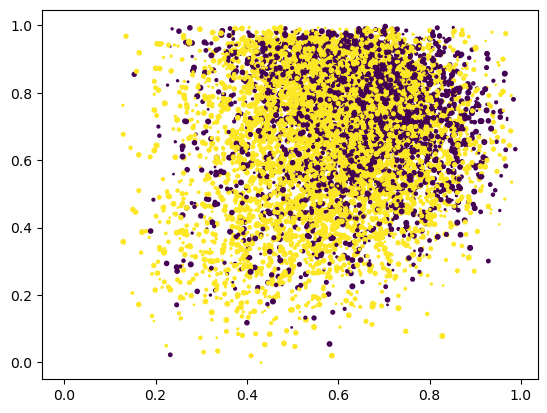

In [27]:
plt.scatter(cluster_df.iloc[:,0], cluster_df.iloc[:,1], cluster_df.iloc[:,2], cluster_df.iloc[:,4]);


In [28]:
cluster_df=cluster_df.drop('cluster_no_sc',axis=1)


In [29]:
#Scaling
cluster_df_copy=cluster_df
cluster_scaled=K_Means.fit(cluster_df_copy)
cluster_df_copy['cluster_sc']=cluster_scaled.labels_

In [30]:
scaler=StandardScaler()
scaler.fit(cluster_df_copy)
scaler.mean_

array([ 6.07843272e-01,  6.81914915e-01,  5.16648488e+00, -7.28911710e+00,
        6.98958850e-01,  6.50843530e-02,  2.10138444e-01,  2.92363628e-02,
        1.86001140e-01,  5.85626772e-01,  1.21406881e+02,  2.25015304e+05,
        3.95994051e+00,  1.90867625e+00])

In [31]:
cluster_scaled=scaler.transform(cluster_df_copy)


In [62]:
cluster_scaled.shape


(1038, 14)

In [63]:
type(cluster_scaled)
cluster_scaled_df=pd.DataFrame(cluster_scaled,columns=['danceability' , 'energy' , 'key' , 'loudness' , 'mode' , 'speechiness' , 'acousticness' , 'instrumentalness' , 'liveness' , 'valence' , 'tempo' , 'duration_ms' , 'time_signature', 'cluster_sc'])
cluster_scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_sc
0,0.395849,-0.297509,1.017337,0.605652,0.655555,-0.221964,-0.834617,-0.334815,-0.530878,0.278454,0.391429,1.033764,0.06565,-0.601489
1,0.778898,0.824874,-1.473872,0.703658,0.655555,0.679276,-0.825154,0.064007,-0.854350,0.537633,-0.037437,0.138089,0.06565,-1.315844
2,0.230612,-0.319409,-0.920270,-1.024181,0.655555,-0.524967,-0.466612,-0.076613,-0.453541,-0.086155,-0.457730,0.068207,0.06565,-1.315844
3,0.433403,-0.806687,-0.366668,-0.370510,0.655555,-0.377350,0.239958,-0.292340,-0.386291,0.423419,-0.307553,-0.584953,0.06565,0.112865
4,-0.460378,0.326646,-0.366668,0.386863,0.655555,-0.506839,-0.553882,-0.335394,-0.480441,-0.288227,-1.103585,0.131923,0.06565,-1.315844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,-1.339137,1.449028,1.017337,0.102436,0.655555,0.189809,-0.827257,-0.218547,-0.204717,-0.345335,0.318832,-1.990136,0.06565,1.541574
1034,-0.542996,0.080269,1.570939,-0.158913,0.655555,-0.113194,-0.577539,-0.335511,-0.520118,0.792420,0.200076,-1.292906,0.06565,1.541574
1035,-0.820895,0.551122,-0.366668,-0.069599,0.655555,-0.338504,-0.865424,-0.335422,0.622456,-0.086155,0.855813,-0.279389,0.06565,0.112865
1036,-0.137415,1.262877,1.017337,0.644615,-1.525426,0.355554,-0.631688,0.223026,-0.594766,0.291632,0.153156,-1.094683,0.06565,1.541574


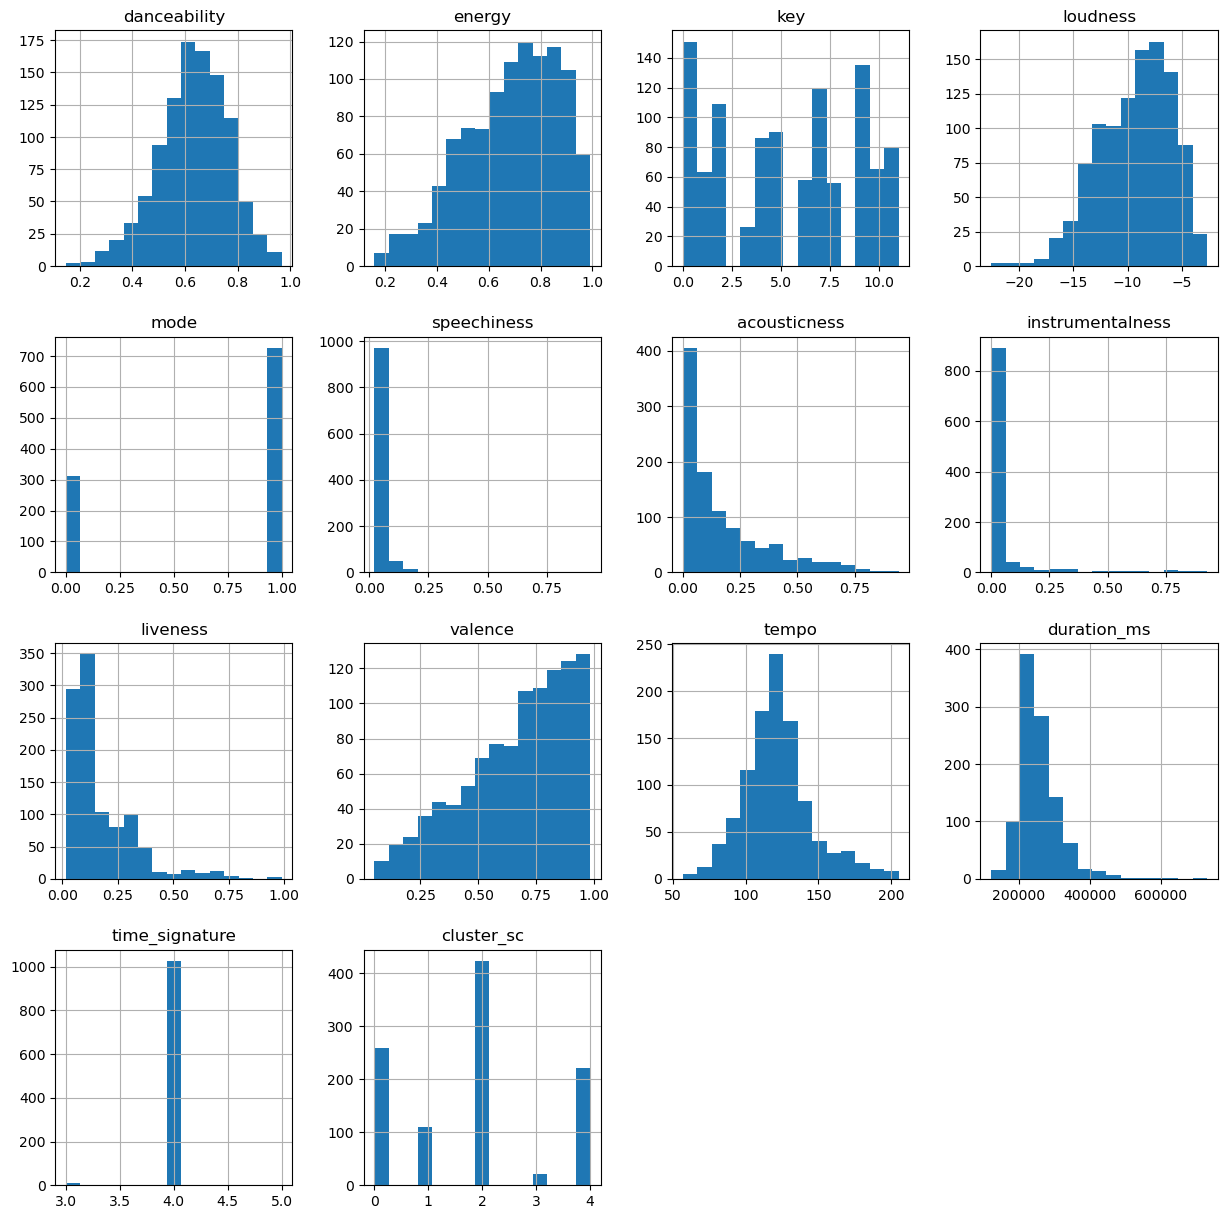

In [64]:
#we compare with the original no scaled checking if more or less has the same pattern
cluster_df.hist(bins=15,figsize=(15,15));

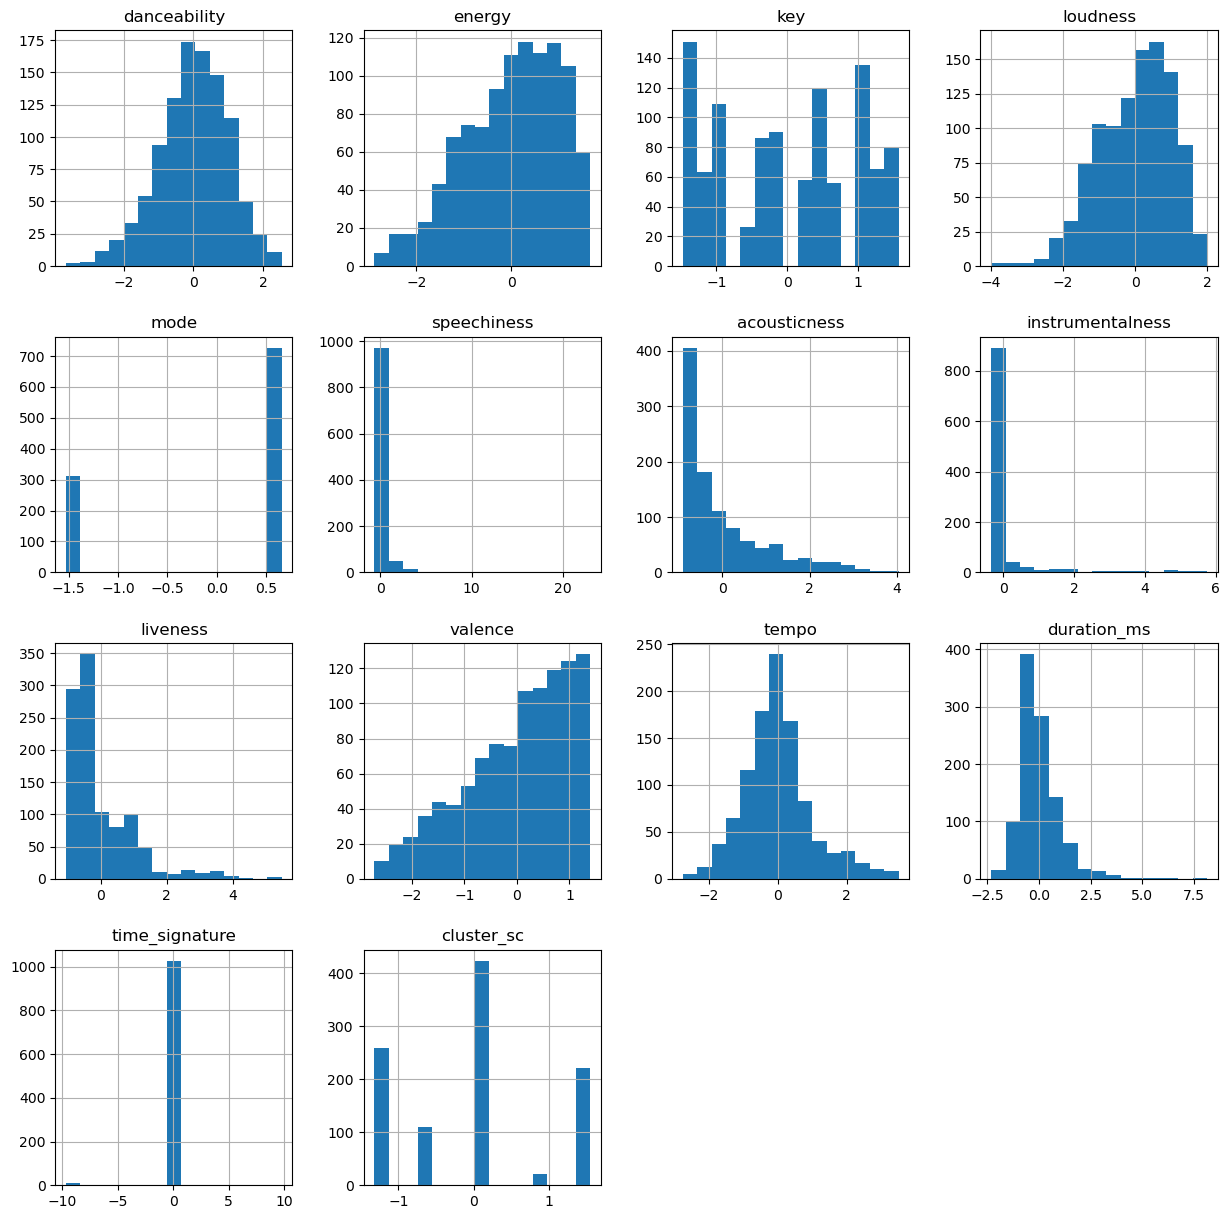

In [65]:
cluster_scaled_df.hist(bins=15,figsize=(15,15));


In [66]:
K_Means=KMeans(n_clusters=5, random_state=5)
cluster_model_scaled=K_Means.fit(cluster_scaled_df)
cluster_model_scaled.cluster_centers_

array([[ 2.89581896e-01,  5.46940543e-02,  4.17601529e-01,
        -6.95351942e-03, -1.52542554e+00, -1.32050904e-03,
        -2.82265645e-01, -1.82058901e-01, -8.78292694e-02,
         1.66362167e-01, -9.98459236e-02,  3.32947877e-01,
         6.56503290e-02, -4.24509480e-01],
       [ 1.31020391e-01,  1.92491667e-01, -2.68145615e-01,
         1.40799936e-01,  6.49393816e-01, -4.31677002e-02,
        -2.82378490e-01, -1.87842308e-01,  1.00597417e-01,
         2.21780647e-01, -1.39654087e-01,  2.99184437e-01,
         9.31503457e-02, -4.96555762e-01],
       [-5.46402362e-01, -1.40028282e+00,  5.97986686e-02,
        -8.45540860e-01,  2.49790997e-01, -2.85082387e-01,
         1.25901558e+00, -2.13909856e-01, -2.43217217e-01,
        -1.25066534e+00, -3.85164302e-01,  1.80772710e-01,
        -3.30541773e-01, -1.73707169e-01],
       [ 2.66173421e-01,  4.52459628e-01, -3.33769930e-02,
         1.46047108e-01,  2.10456753e-01,  2.36847884e-01,
        -4.22455606e-01,  4.03542728e+00,  1.

In [67]:
cluster_model_scaled.labels_


array([1, 1, 1, ..., 1, 4, 2], dtype=int32)

In [68]:
cluster_scaled_df['cluster_sc']=cluster_model_scaled.labels_


In [69]:
cluster_scaled_df['cluster_sc'].value_counts()


1    354
4    241
0    222
2    172
3     49
Name: cluster_sc, dtype: int64

In [70]:
cluster_scaled_df


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_sc
0,0.395849,-0.297509,1.017337,0.605652,0.655555,-0.221964,-0.834617,-0.334815,-0.530878,0.278454,0.391429,1.033764,0.06565,1
1,0.778898,0.824874,-1.473872,0.703658,0.655555,0.679276,-0.825154,0.064007,-0.854350,0.537633,-0.037437,0.138089,0.06565,1
2,0.230612,-0.319409,-0.920270,-1.024181,0.655555,-0.524967,-0.466612,-0.076613,-0.453541,-0.086155,-0.457730,0.068207,0.06565,1
3,0.433403,-0.806687,-0.366668,-0.370510,0.655555,-0.377350,0.239958,-0.292340,-0.386291,0.423419,-0.307553,-0.584953,0.06565,1
4,-0.460378,0.326646,-0.366668,0.386863,0.655555,-0.506839,-0.553882,-0.335394,-0.480441,-0.288227,-1.103585,0.131923,0.06565,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,-1.339137,1.449028,1.017337,0.102436,0.655555,0.189809,-0.827257,-0.218547,-0.204717,-0.345335,0.318832,-1.990136,0.06565,4
1034,-0.542996,0.080269,1.570939,-0.158913,0.655555,-0.113194,-0.577539,-0.335511,-0.520118,0.792420,0.200076,-1.292906,0.06565,4
1035,-0.820895,0.551122,-0.366668,-0.069599,0.655555,-0.338504,-0.865424,-0.335422,0.622456,-0.086155,0.855813,-0.279389,0.06565,1
1036,-0.137415,1.262877,1.017337,0.644615,-1.525426,0.355554,-0.631688,0.223026,-0.594766,0.291632,0.153156,-1.094683,0.06565,4


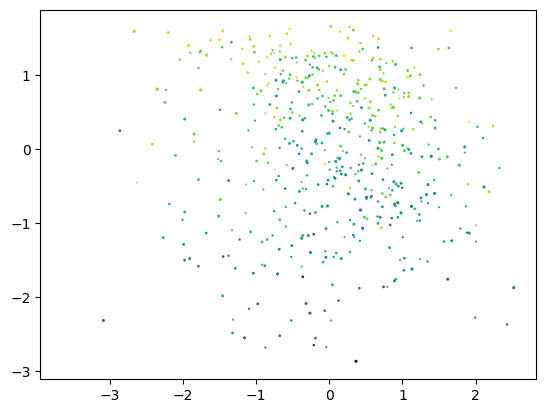

In [71]:
plt.scatter(cluster_scaled_df.iloc[:,0], cluster_scaled_df.iloc[:,1], cluster_scaled_df.iloc[:,2], cluster_scaled_df.iloc[:,3]);

In [72]:
cluster_scaled_df=cluster_scaled_df.drop('cluster_sc',axis=1)


In [75]:
K=range(5,18)
inertia=[]
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=5)
    kmeans.fit(cluster_scaled_df)
    inertia.append(kmeans.inertia_)

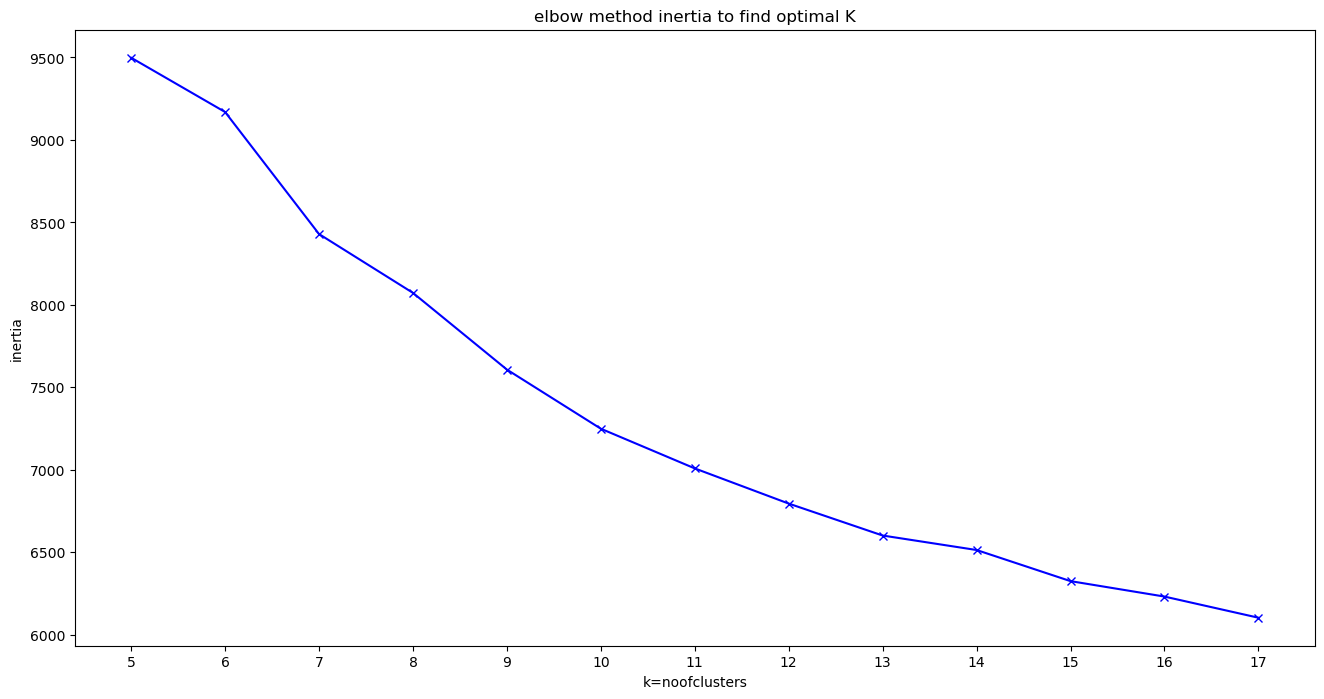

In [76]:
#plot the resulting inertia - elbow 
plt.figure(figsize=(16,8))
plt.plot(K,inertia,'bx-')
plt.xlabel('k=noofclusters')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('elbow method inertia to find optimal K');

In [77]:
K=range(5,18)
sil=[]
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=5)
    kmeans.fit(cluster_scaled_df)
    sil.append(silhouette_score(cluster_scaled_df,kmeans.predict(cluster_scaled_df)))

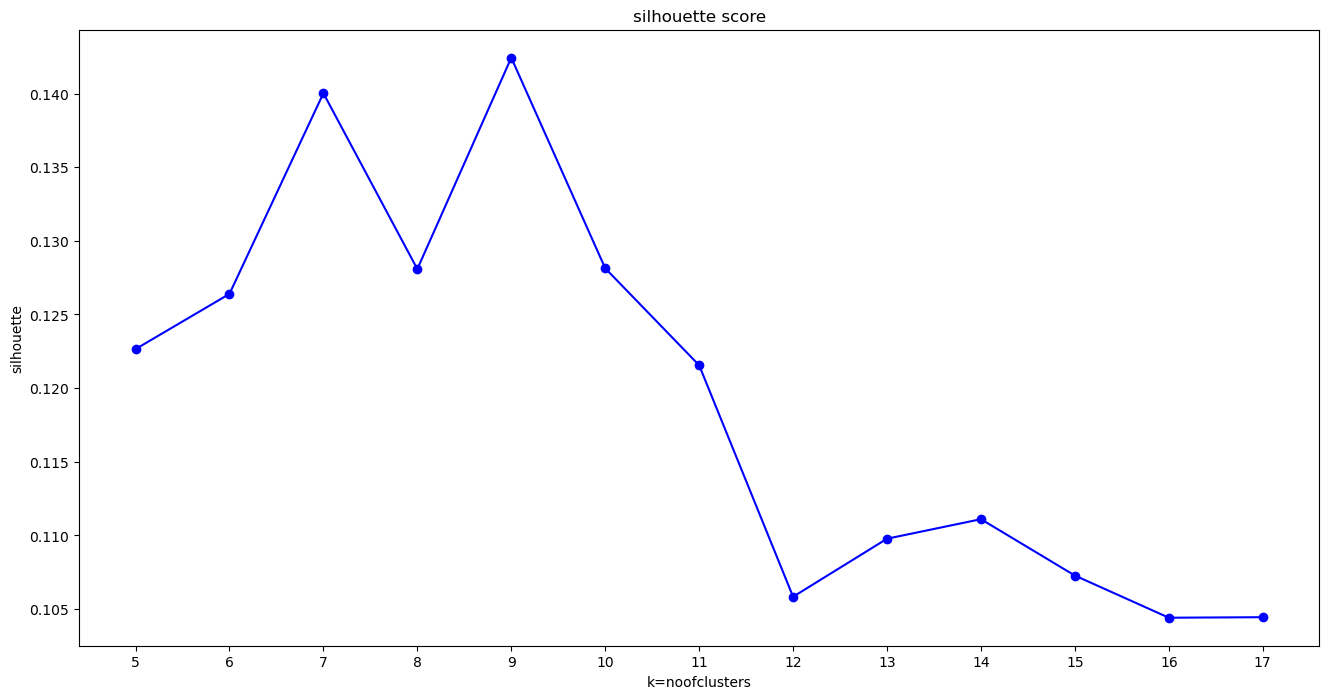

In [78]:
plt.figure(figsize=(16,8))
plt.plot(K,sil,'bo-')
plt.xlabel('k=noofclusters')
plt.ylabel('silhouette')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('silhouette score');

In [79]:
# We choose the K = 10 to redo the cluster


In [80]:
kmeans=KMeans(n_clusters=9, random_state=5)
ClMo=kmeans.fit(cluster_scaled_df)
cluster_scaled_df['cluster_final']=ClMo.labels_
cluster_scaled_df['cluster_final'].value_counts()

1    345
8    214
2    169
3    155
4     54
5     48
0     43
6      9
7      1
Name: cluster_final, dtype: int64

In [81]:
cluster_scaled_df


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_final
0,0.395849,-0.297509,1.017337,0.605652,0.655555,-0.221964,-0.834617,-0.334815,-0.530878,0.278454,0.391429,1.033764,0.06565,1
1,0.778898,0.824874,-1.473872,0.703658,0.655555,0.679276,-0.825154,0.064007,-0.854350,0.537633,-0.037437,0.138089,0.06565,1
2,0.230612,-0.319409,-0.920270,-1.024181,0.655555,-0.524967,-0.466612,-0.076613,-0.453541,-0.086155,-0.457730,0.068207,0.06565,1
3,0.433403,-0.806687,-0.366668,-0.370510,0.655555,-0.377350,0.239958,-0.292340,-0.386291,0.423419,-0.307553,-0.584953,0.06565,1
4,-0.460378,0.326646,-0.366668,0.386863,0.655555,-0.506839,-0.553882,-0.335394,-0.480441,-0.288227,-1.103585,0.131923,0.06565,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,-1.339137,1.449028,1.017337,0.102436,0.655555,0.189809,-0.827257,-0.218547,-0.204717,-0.345335,0.318832,-1.990136,0.06565,2
1034,-0.542996,0.080269,1.570939,-0.158913,0.655555,-0.113194,-0.577539,-0.335511,-0.520118,0.792420,0.200076,-1.292906,0.06565,1
1035,-0.820895,0.551122,-0.366668,-0.069599,0.655555,-0.338504,-0.865424,-0.335422,0.622456,-0.086155,0.855813,-0.279389,0.06565,2
1036,-0.137415,1.262877,1.017337,0.644615,-1.525426,0.355554,-0.631688,0.223026,-0.594766,0.291632,0.153156,-1.094683,0.06565,8


In [82]:
playlist_features


,title,artist,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,Original Sin,INXS,7pSzRRMaPXA39wvrnvdmSH,0.685,0.633,9,-7.259,1,0.0377,0.01360,0.000106,0.0935,0.731,131.397,audio_features,spotify:track:7pSzRRMaPXA39wvrnvdmSH,https://api.spotify.com/v1/tracks/7pSzRRMaPXA3...,https://api.spotify.com/v1/audio-analysis/7pSz...,317240,4
1,Sussudio,Phil Collins,07zkNvtcmPOFlMOXbma13k,0.736,0.838,0,-6.932,1,0.0725,0.01540,0.060800,0.0454,0.790,121.242,audio_features,spotify:track:07zkNvtcmPOFlMOXbma13k,https://api.spotify.com/v1/tracks/07zkNvtcmPOF...,https://api.spotify.com/v1/audio-analysis/07zk...,264947,4
2,Don't You (Forget About Me),Simple Minds,603aPXFY2Ec2WuFganUGuD,0.663,0.629,2,-12.697,1,0.0260,0.08360,0.039400,0.1050,0.648,111.290,audio_features,spotify:track:603aPXFY2Ec2WuFganUGuD,https://api.spotify.com/v1/tracks/603aPXFY2Ec2...,https://api.spotify.com/v1/audio-analysis/603a...,260867,4
3,Everywhere,Fleetwood Mac,6i8ecOsx4J2Px1maiqzqoG,0.690,0.540,4,-10.516,1,0.0317,0.21800,0.006570,0.1150,0.764,114.846,audio_features,spotify:track:6i8ecOsx4J2Px1maiqzqoG,https://api.spotify.com/v1/tracks/6i8ecOsx4J2P...,https://api.spotify.com/v1/audio-analysis/6i8e...,222733,4
4,High & Dry,ABC,7oWqXVRExRlNR0jZJNoO9w,0.571,0.747,4,-7.989,1,0.0267,0.06700,0.000018,0.1010,0.602,95.997,audio_features,spotify:track:7oWqXVRExRlNR0jZJNoO9w,https://api.spotify.com/v1/tracks/7oWqXVRExRlN...,https://api.spotify.com/v1/audio-analysis/7oWq...,264587,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,If I Should Fall From Grace With God,The Pogues,2QlYQQ8JpZf8mAk7PWcXsB,0.454,0.952,9,-8.938,1,0.0536,0.01500,0.017800,0.1420,0.589,129.678,audio_features,spotify:track:2QlYQQ8JpZf8mAk7PWcXsB,https://api.spotify.com/v1/tracks/2QlYQQ8JpZf8...,https://api.spotify.com/v1/audio-analysis/2QlY...,140693,4
1034,The Devil's Right Hand,Steve Earle,59JOneFVktVPSm0agaQWDo,0.560,0.702,11,-9.810,1,0.0419,0.06250,0.000000,0.0951,0.848,126.866,audio_features,spotify:track:59JOneFVktVPSm0agaQWDo,https://api.spotify.com/v1/tracks/59JOneFVktVP...,https://api.spotify.com/v1/audio-analysis/59JO...,181400,4
1035,Europe After the Rain,John Foxx,7p1wyDdcnJuwQDodZh1Duq,0.523,0.788,4,-9.512,1,0.0332,0.00774,0.000014,0.2650,0.648,142.393,audio_features,spotify:track:7p1wyDdcnJuwQDodZh1Duq,https://api.spotify.com/v1/tracks/7p1wyDdcnJuw...,https://api.spotify.com/v1/audio-analysis/7p1w...,240573,4
1036,That's What You Always Say,The Dream Syndicate,7jgfLVXTBxufrbccakHQi1,0.614,0.918,9,-7.129,0,0.0600,0.05220,0.085000,0.0840,0.734,125.755,audio_features,spotify:track:7jgfLVXTBxufrbccakHQi1,https://api.spotify.com/v1/tracks/7jgfLVXTBxuf...,https://api.spotify.com/v1/audio-analysis/7jgf...,192973,4


In [83]:
playlist_names=playlist_features[['title','artist','song_id']]
cluster_final=cluster_scaled_df['cluster_final']
playlist_cluster=playlist_names.join(cluster_final)
playlist_cluster

,title,artist,song_id,cluster_final
0,Original Sin,INXS,7pSzRRMaPXA39wvrnvdmSH,1
1,Sussudio,Phil Collins,07zkNvtcmPOFlMOXbma13k,1
2,Don't You (Forget About Me),Simple Minds,603aPXFY2Ec2WuFganUGuD,1
3,Everywhere,Fleetwood Mac,6i8ecOsx4J2Px1maiqzqoG,1
4,High & Dry,ABC,7oWqXVRExRlNR0jZJNoO9w,1
...,...,...,...,...
1033,If I Should Fall From Grace With God,The Pogues,2QlYQQ8JpZf8mAk7PWcXsB,2
1034,The Devil's Right Hand,Steve Earle,59JOneFVktVPSm0agaQWDo,1
1035,Europe After the Rain,John Foxx,7p1wyDdcnJuwQDodZh1Duq,2
1036,That's What You Always Say,The Dream Syndicate,7jgfLVXTBxufrbccakHQi1,8


In [84]:
playlist_cluster


,title,artist,song_id,cluster_final
0,Original Sin,INXS,7pSzRRMaPXA39wvrnvdmSH,1
1,Sussudio,Phil Collins,07zkNvtcmPOFlMOXbma13k,1
2,Don't You (Forget About Me),Simple Minds,603aPXFY2Ec2WuFganUGuD,1
3,Everywhere,Fleetwood Mac,6i8ecOsx4J2Px1maiqzqoG,1
4,High & Dry,ABC,7oWqXVRExRlNR0jZJNoO9w,1
...,...,...,...,...
1033,If I Should Fall From Grace With God,The Pogues,2QlYQQ8JpZf8mAk7PWcXsB,2
1034,The Devil's Right Hand,Steve Earle,59JOneFVktVPSm0agaQWDo,1
1035,Europe After the Rain,John Foxx,7p1wyDdcnJuwQDodZh1Duq,2
1036,That's What You Always Say,The Dream Syndicate,7jgfLVXTBxufrbccakHQi1,8


In [86]:
from IPython.display import display

input_song= input('what song do you like?\n\n ')
lower_song=input_song.lower()

df = songs.applymap(lambda s:s.lower() if type(s) == str else s)

if lower_song in df['Song_title'].values:
    print ('\nCongrats! This is a hot song from the Billboard Top 100')
    
elif lower_song in playlist_cluster_lower['title'].values: 
    print('''\nThis is not a hot song or does not match with the Billboard Top 100, 
    but we have found some songs from a Spotify list based 
    in the genre of the song you selected!\n''')
    
    playlist_cluster_lower = playlist_cluster.applymap(lambda s:s.lower() if type(s) == str else s)
    prova=playlist_cluster_lower.query("title == @input_song")
    print(prova)
    
else:
    print('\nSorry! We can not find the song you are looking for' )
        

what song do you like?

 Anti-hero

Congrats! This is a hot song from the Billboard Top 100


In [ ]:
#     track_id = sp.search(q='track:' + lower_song, type='track', limit=1)
#     x = track_id["tracks"]['items'][0]['id']
#     audio_feat=pd.DataFrame(sp.audio_features(tracks=x))
#     audio_feat